In [105]:
# Hounds and Hare Game

Steps

Complete the Gym Environment: Flesh out the reset and render methods in the HoundsAndHareEnv class.

Test the Environment: Before integrating with RL, thoroughly test the environment to ensure it behaves as expected.

RL Agent Integration: Once the environment is tested, integrate it with a RL library like stable-baselines and start the training process.

Training and Evaluation: Train the RL agent using your environment, evaluate its performance, and adjust parameters as needed.


                

Initialize the Environment:
  Create an instance of your Gym environment.

Simulate a Game:
  Reset the environment to start a new game.
  Choose actions (either randomly or specific test cases) and apply them using the step method.
  Check the outputs from step to ensure the state updates and rewards are correct.
  Optionally, render the state to visually confirm the game's progress.

Check Termination Conditions:
  Make sure the game correctly identifies end-game conditions, like a win or a draw.


# Import packages

In [108]:
# !pip install matplotlib networkx -q
# !pip install gym -q
# !pip install stable-baselines3 -q

In [109]:
from hounds_and_hare import HoundsAndHare
from hounds_and_hare_env import HoundsAndHareEnv
import gym
from gym.envs.registration import register

from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env

# Testing board display and moves

In [111]:
# Example usage
game = HoundsAndHare()

In [112]:
game.display_board()

H H . . 
. . . 
H . . R 


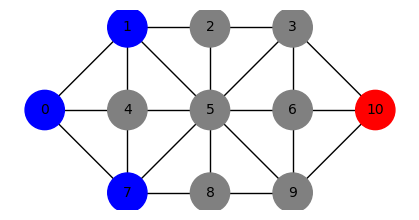

In [113]:
game.visualize_board()

In [114]:
print(game.move_hound(1, 5))
print(game.move_hound(7, 9))

True
False


In [115]:
print(game.move_hare(6))
print(game.move_hare(8))

True
False


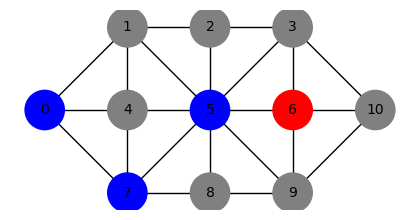

In [116]:
game.visualize_board()

# Register and Create the Environment

In [118]:
register(
    id='HoundsAndHareEnv-v0',
    entry_point='hounds_and_hare_env:HoundsAndHareEnv',
)

In [119]:
env = gym.make('HoundsAndHareEnv-v0')

# Test the environment

Episode 1
Turn:  Hounds
Step 0: Action 39 -> Reward: -1, Done: True
Info: Invalid move by Hare to 6


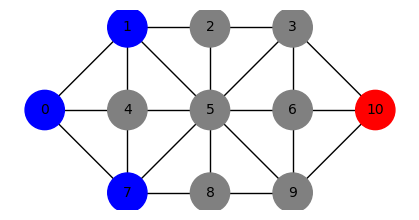

Episode finished

Episode 2
Turn:  Hounds
Step 0: Action 36 -> Reward: -1, Done: True
Info: Invalid move by Hare to 3


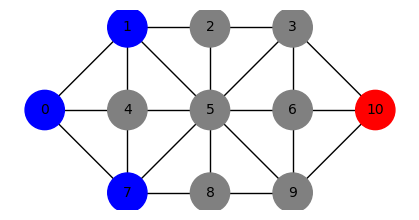

Episode finished

Episode 3
Turn:  Hounds
Step 0: Action 33 -> Reward: -1, Done: True
Info: Invalid move by Hare to 0


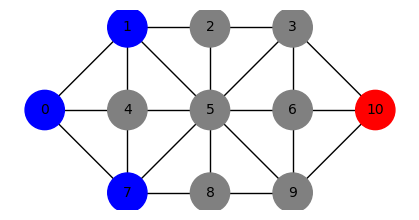

Episode finished

Episode 4
Turn:  Hounds
Step 0: Action 18 -> Reward: -1, Done: True
Info: Invalid move by Hound 1 to 7


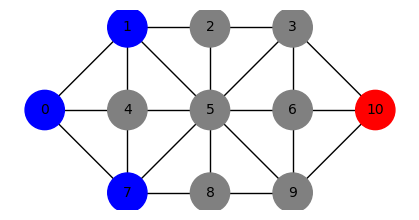

Episode finished

Episode 5
Turn:  Hounds
Step 0: Action 2 -> Reward: -1, Done: True
Info: Invalid move by Hound 0 to 2


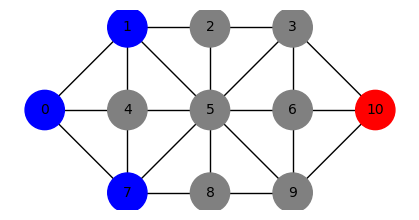

Episode finished



In [121]:
for episode in range(5):  # Run 5 test episodes
    state = env.reset()
    done = False
    step_count = 0
    
    print(f"Episode {episode + 1}")
    
    while not done and step_count < 5:  # Limit steps to avoid infinite loops
        print(f"Turn:  {env.game.current_player}")
        action = env.action_space.sample()  # Random action
        next_state, reward, done, info = env.step(action)
        
        print(f"Step {step_count}: Action {action} -> Reward: {reward}, Done: {done}")
        print(f"Info: {info.get('message', 'N/A')}")
        env.render()  # Visualize the game state
        state = next_state
        step_count += 1
    
    print("Episode finished\n")

env.close()